<a href="https://colab.research.google.com/github/fcndrd/BayesianML/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
""" 
manually
import data found at https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

"""

ValueError: ignored

                      fixed acidity  volatile acidity  ...  alcohol  quality
fixed acidity                 1.000            -0.256  ...   -0.062    0.124
volatile acidity             -0.256             1.000  ...   -0.202   -0.391
citric acid                   0.672            -0.552  ...    0.110    0.226
residual sugar                0.115             0.002  ...    0.042    0.014
chlorides                     0.094             0.061  ...   -0.221   -0.129
free sulfur dioxide          -0.154            -0.011  ...   -0.069   -0.051
total sulfur dioxide         -0.113             0.076  ...   -0.206   -0.185
density                       0.668             0.022  ...   -0.496   -0.175
pH                           -0.683             0.235  ...    0.206   -0.058
sulphates                     0.183            -0.261  ...    0.094    0.251
alcohol                      -0.062            -0.202  ...    1.000    0.476
quality                       0.124            -0.391  ...    0.476    1.000

Counter({3: 10, 4: 53, 5: 681, 6: 638, 7: 199, 8: 18})

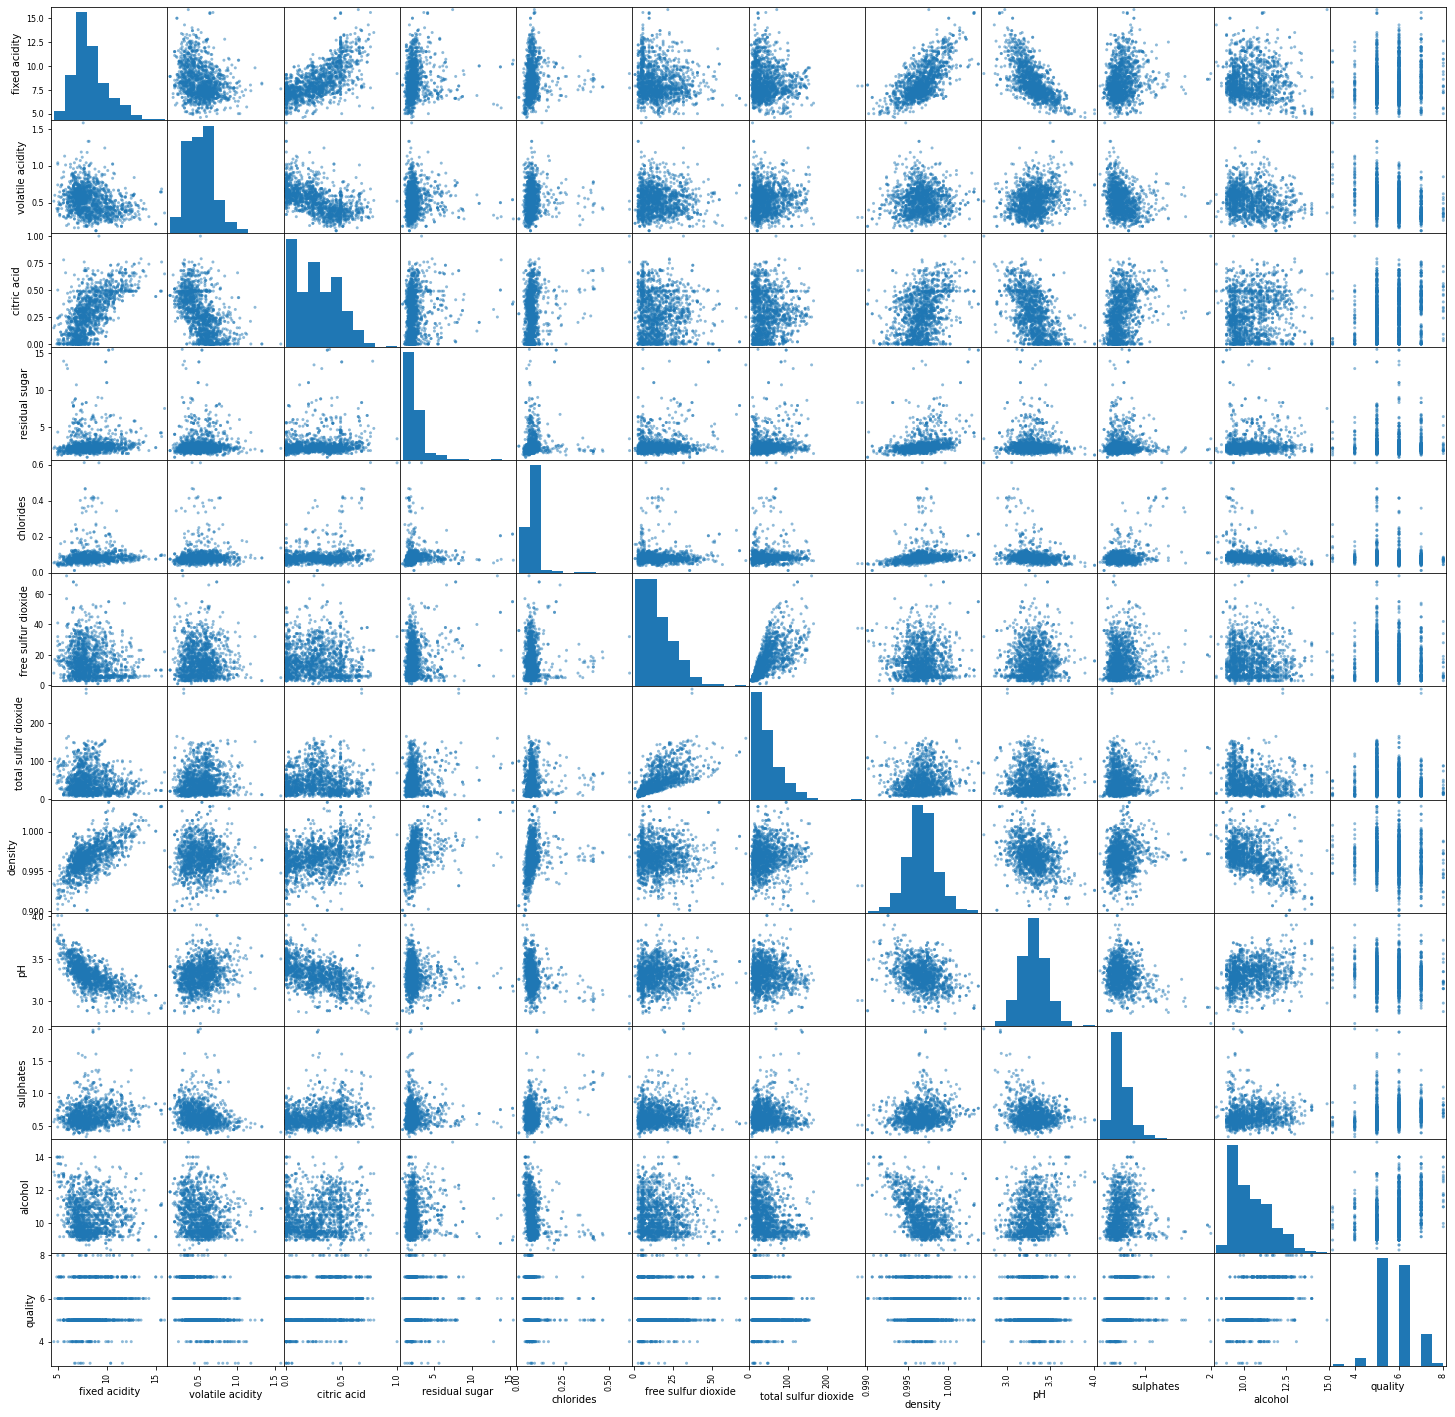

In [ ]:

"""
Dataset parsing
To make the code work, upload the csv to the colab folder. For some reason they don't make you save it 
"""
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix


data=[]
#parsing data from csv
# Hey I changed the .xls to .csv to make it run with my file
df=pd.read_csv('/content/winequality-red.csv')


scatter_matrix(df, figsize = (25,25))
corr_mtx = df.corr()
corr_mtx.round(3)
print(corr_mtx.round(3))


corr_mtx['quality'].abs().sort_values(ascending = False)


from collections import Counter
Counter(df['quality'])









quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64



Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})


Text(0, 0.5, 'Number of occurences')

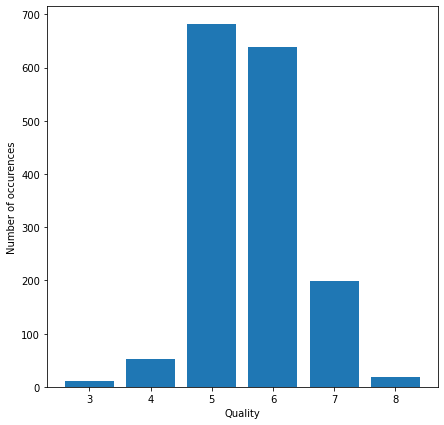

In [ ]:
#print correlation with quality in ascendin value
print(corr_mtx['quality'].abs().sort_values(ascending = False))

print('\n\n')

#Count elements for each class
from collections import Counter
c=Counter(df['quality'])
print(c)
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.bar(c.keys(), c.values())
plt.xlabel("Quality")
plt.ylabel("Number of occurences")

# Class 1-2 are not present as well as 9-10

In [ ]:
'''
train - test split

'''
from sklearn.model_selection import train_test_split
from sklearn import metrics



## convert the dataframe to numpy array
data = df.to_numpy()

binary=1
if binary:
  for x in range(len(data[:,11])):
    if data[x,11]<7:
        #x = 0
        data[x,11] = 0
    else:
        #x = 1
        data[x,11] = 1

#for x in range(len(data[:,11])):
#    print(data[x, 11])  

X,y = data[:,0:-1],data[:,-1]





## Spliting training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=True)
print(X.shape,y.shape,X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(len(X[1]))

from sklearn.preprocessing import StandardScaler
# standarization
std_trans = StandardScaler()
X_train = std_trans.fit_transform(X_train)
X_test = std_trans.transform(X_test)

(1599, 11) (1599,) (1199, 11) (1199,) (400, 11) (400,)
11


In [ ]:
''' 
Linear Model
Is it fair to use regression and then round quality? Or should we only use multiclass classification?
'''
from sklearn import linear_model
Linear=linear_model.LinearRegression();
Linear.fit(X_train, y_train)
y_pred=Linear.predict(X_test).round(0)
y_pred_train=Linear.predict(X_train).round(0)

# Calculate metrics
rounded_mse = metrics.mean_squared_error(y_pred.round(0),y_test)
regular_mse= metrics.mean_squared_error(Linear.predict(X_test),y_test)
print(rounded_mse)
print(regular_mse)
test_accuracy =metrics.accuracy_score(y_test,y_pred)
test_f1score =metrics.f1_score(y_test,y_pred,average='weighted')
print('test accuracy: '+str(test_accuracy))
print('test f1score: '+str(test_f1score))
train_accuracy=metrics.accuracy_score(y_train,y_pred_train)
train_f1score=metrics.f1_score(y_train,y_pred_train,average='weighted')
print('train accuracy: '+str(train_accuracy))
print('train f1score: '+str(train_f1score))


metrics.confusion_matrix(y_test,y_pred)

0.1225
0.08917725612699078
test accuracy: 0.8775
test f1score: 0.8308701093244553
train accuracy: 0.8690575479566305
train f1score: 0.8277433960426711


array([[347,   1],
       [ 48,   4]])

test accuracy: 0.88125
test f1score: 0.8591294880910059
train accuracy: 0.9163408913213448
train f1score: 0.9063905686634426


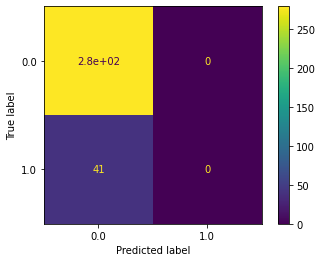

In [ ]:
''' 
KNN 

'''
from sklearn.neighbors import KNeighborsClassifier 


kn=KNeighborsClassifier(n_neighbors=4)
kn.fit(X_train, y_train)
y_pred=kn.predict(X_test)
y_pred_train=kn.predict(X_train)




# Calculate metrics


test_accuracy=metrics.accuracy_score(y_test,y_pred)
test_f1score =metrics.f1_score(y_test,y_pred,average='weighted')
print('test accuracy: '+str(test_accuracy))
print('test f1score: '+str(test_f1score))
train_accuracy=metrics.accuracy_score(y_train,y_pred_train)
train_f1score=metrics.f1_score(y_train,y_pred_train,average='weighted')
print('train accuracy: '+str(train_accuracy))
print('train f1score: '+str(train_f1score))


metrics.plot_confusion_matrix(model,X_test,y_test)

[1, 5, 10, 20, 30, 40, 50, 60, 70, 80]
[0.9      0.878125 0.878125 0.875    0.88125  0.871875 0.871875 0.875
 0.8875   0.89375 ]


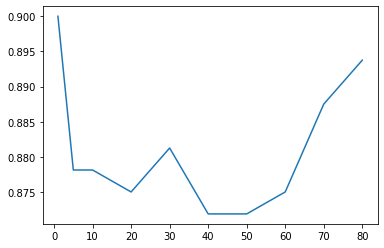

In [ ]:
''' 
KNN iterative

'''
from sklearn.neighbors import KNeighborsClassifier 
m=np.zeros(10)
k=[1,5,10,20,30,40,50,60,70,80]
for i in range(len(k)):

  kn=KNeighborsClassifier(n_neighbors=k[i]);
  kn.fit(X_train, y_train)
  y_pred=kn.predict(X_test)
  y_pred_train=kn.predict(X_train)
  m[i]=metrics.accuracy_score(y_test,y_pred)

plt.plot(k,m)
print(k)
print(m)


# Calculate metrics


test accuracy: 0.865625
test f1score: 0.8032768006700166
train accuracy: 0.8639562157935887
train f1score: 0.8008990087683855


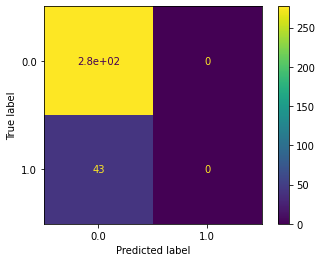

In [ ]:
''' 
Linear SVC
'''
from sklearn.svm import SVC 
model=SVC(kernel='linear');
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

# Calculate metrics

test_accuracy =metrics.accuracy_score(y_test,y_pred)
test_f1score =metrics.f1_score(y_test,y_pred,average='weighted')
print('test accuracy: '+str(test_accuracy))
print('test f1score: '+str(test_f1score))
train_accuracy=metrics.accuracy_score(y_train,y_pred_train)
train_f1score=metrics.f1_score(y_train,y_pred_train,average='weighted')
print('train accuracy: '+str(train_accuracy))
print('train f1score: '+str(train_f1score))


metrics.plot_confusion_matrix(model,X_test,y_test)

test accuracy: 0.903125
test f1score: 0.8926332203863044
train accuracy: 0.9038311180609852
train f1score: 0.8852348262490838


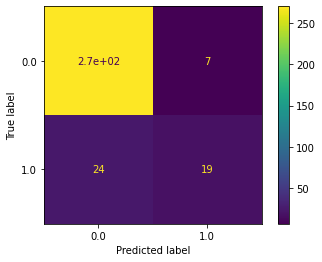

In [ ]:
''' 
rbf SVC
'''
from sklearn.svm import SVC 
model=SVC(gamma=0.1,kernel='rbf'); #gamma greater than 1 overfitting?
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)
# Calculate metrics

test_accuracy =metrics.accuracy_score(y_test,y_pred)
test_f1score =metrics.f1_score(y_test,y_pred,average='weighted')
print('test accuracy: '+str(test_accuracy))
print('test f1score: '+str(test_f1score))
train_accuracy=metrics.accuracy_score(y_train,y_pred_train)
train_f1score=metrics.f1_score(y_train,y_pred_train,average='weighted')
print('train accuracy: '+str(train_accuracy))
print('train f1score: '+str(train_f1score))


metrics.plot_confusion_matrix(model,X_test,y_test)

[0.875      0.87       0.8525     0.89473684]
test accuracy: 0.915
test f1score: 0.9101768607221814
train accuracy: 1.0
train f1score: 1.0


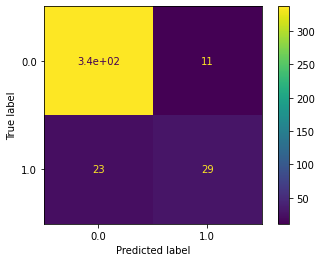

In [ ]:
''' 
Random Forest Classifier

'''
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier 
model=RandomForestClassifier(max_depth=15,max_features=3); 
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)
scores = cross_val_score(model, X, y, cv=4)
print(scores)

# Calculate metrics

test_accuracy =metrics.accuracy_score(y_test,y_pred)
test_f1score =metrics.f1_score(y_test,y_pred,average='weighted')
print('test accuracy: '+str(test_accuracy))
print('test f1score: '+str(test_f1score))
train_accuracy=metrics.accuracy_score(y_train,y_pred_train)
train_f1score=metrics.f1_score(y_train,y_pred_train,average='weighted')
print('train accuracy: '+str(train_accuracy))
print('train f1score: '+str(train_f1score))


metrics.confusion_matrix(y_test,y_pred)
metrics.plot_confusion_matrix(model,X_test,y_test)

In [ ]:
''' 
Adaboost classifier
'''

from sklearn.ensemble import AdaBoostClassifier 
%matplotlib qt
model=AdaBoostClassifier(n_estimators=150, random_state=0); 
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

# Calculate metrics

test_accuracy =metrics.accuracy_score(y_test,y_pred)
test_f1score =metrics.f1_score(y_test,y_pred,average='weighted')
print('test accuracy: '+str(test_accuracy))
print('test f1score: '+str(test_f1score))
train_accuracy=metrics.accuracy_score(y_train,y_pred_train)
train_f1score=metrics.f1_score(y_train,y_pred_train,average='weighted')
print('train accuracy: '+str(train_accuracy))
print('train f1score: '+str(train_f1score))


#metrics.confusion_matrix(y_test,y_pred)
metrics.plot_confusion_matrix(model,X_test,y_test)

ImportError: ignored

In [ ]:
''' 
Bayesian Ridge Regression

'''
from sklearn.linear_model import BayesianRidge 
model=BayesianRidge(compute_score=True); 
model.fit(X_train, y_train)
y_pred=model.predict(X_test).round(0)
y_pred_train=model.predict(X_train).round(0)

# Calculate metrics

test_accuracy =metrics.accuracy_score(y_test,y_pred)
test_f1score =metrics.f1_score(y_test,y_pred,average='weighted')
print('test accuracy: '+str(test_accuracy))
print('test f1score: '+str(test_f1score))
train_accuracy=metrics.accuracy_score(y_train,y_pred_train)
train_f1score=metrics.f1_score(y_train,y_pred_train,average='weighted')
print('train accuracy: '+str(train_accuracy))
print('train f1score: '+str(train_f1score))

print(model.coef_)
print(len(model.coef_))

plt.figure(figsize=(6, 5))

plt.plot(np.linspace(1,11,11),model.coef_, color='lightgreen',
         label="Bayesian Ridge estimate")

plt.figure(figsize=(6, 5))
plt.plot(model.scores_, color='navy')



metrics.confusion_matrix(y_test,y_pred)

test accuracy: 0.8675
test f1score: 0.8168597177428577
train accuracy: 0.8690575479566305
train f1score: 0.8256600301321438
[ 0.04963465 -0.02987229  0.01504733  0.02843526 -0.03471142 -0.00978194
 -0.01732571 -0.06731098 -0.00180919  0.05972307  0.07985201]
11


ImportError: ignored

In [ ]:
'''
install RVC

'''
!pip install https://github.com/JamesRitchie/scikit-rvm/archive/master.zip

     | 30kB 40.2MB/s
  Created wheel for scikit-rvm: filename=scikit_rvm-0.1.0a1-cp37-none-any.whl size=4241 sha256=a59598a7ff685a8b931c96c12484378bc6367636653c867252bc3c19e0ff4238
  Stored in directory: /tmp/pip-ephem-wheel-cache-zhp93v02/wheels/af/95/a8/8e6687a532bec457f69b1c04c127ef85c96006c5bb4971f7f0
Successfully built scikit-rvm


test accuracy: 0.89375
test f1score: 0.878451138519924
train accuracy: 0.8764659890539483
train f1score: 0.8582464277185455


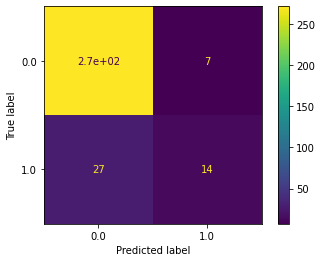

In [ ]:
''' 
RVC

'''

from skrvm import RVC
model=RVC(kernel='linear') 
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)
# Calculate metrics

test_accuracy =metrics.accuracy_score(y_test,y_pred)
test_f1score =metrics.f1_score(y_test,y_pred,average='weighted')
print('test accuracy: '+str(test_accuracy))
print('test f1score: '+str(test_f1score))
train_accuracy=metrics.accuracy_score(y_train,y_pred_train)
train_f1score=metrics.f1_score(y_train,y_pred_train,average='weighted')
print('train accuracy: '+str(train_accuracy))
print('train f1score: '+str(train_f1score))


metrics.plot_confusion_matrix(model,X_test,y_test)

In [ ]:
''' 
RVC with reduced features

Due to the long computation time using the rbf kernel, we decided to drop out

'''
X_train.delete


from skrvm import RVC
model=RVC(kernel='linear') 
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

# Calculate metrics

test_accuracy =metrics.accuracy_score(y_test,y_pred)
test_f1score =metrics.f1_score(y_test,y_pred,average='weighted')
print('test accuracy: '+str(test_accuracy))
print('test f1score: '+str(test_f1score))
train_accuracy=metrics.accuracy_score(y_train,y_pred_train)
train_f1score=metrics.f1_score(y_train,y_pred_train,average='weighted')
print('train accuracy: '+str(train_accuracy))
print('train f1score: '+str(train_f1score))



metrics.confusion_matrix(y_test,y_pred)

AttributeError: ignored

In [ ]:
MLP

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test accuracy: 0.8975
test f1score: 0.6019417475728156
train accuracy: 0.9841534612176814
train f1score: 0.939297124600639


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


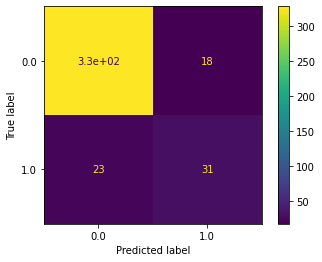

In [ ]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)
# Calculate metrics

test_accuracy =metrics.accuracy_score(y_test,y_pred)
test_f1score =metrics.f1_score(y_test,y_pred)
print('test accuracy: '+str(test_accuracy))
print('test f1score: '+str(test_f1score))
train_accuracy=metrics.accuracy_score(y_train,y_pred_train)
train_f1score=metrics.f1_score(y_train,y_pred_train)
print('train accuracy: '+str(train_accuracy))
print('train f1score: '+str(train_f1score))


metrics.plot_confusion_matrix(model,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/loc

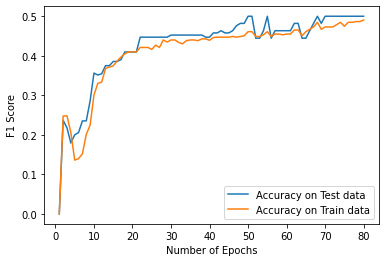

In [ ]:
'''
Determining number of epochs 
'''
from sklearn.neural_network import MLPClassifier
max_epoch=80
train_accuracy=np.zeros(max_epoch)
test_accuracy=np.zeros(max_epoch)
for i in range(1,max_epoch):
  model=MLPClassifier(random_state=1, max_iter=i)
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  y_pred_train=model.predict(X_train)
  test_accuracy[i] =metrics.f1_score(y_test,y_pred)
  train_accuracy[i]=metrics.f1_score(y_train,y_pred_train) 

plt.figure()
plt.plot(np.linspace(1,max_epoch,max_epoch),test_accuracy, label='Accuracy on Test data')
plt.plot(np.linspace(1,max_epoch,max_epoch),train_accuracy, label='Accuracy on Train data')
plt.xlabel('Number of Epochs')
plt.ylabel('F1 Score')
plt.legend()
